In [1]:
# 기본 라이브러리
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt

# 딥러닝 라이브러리
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image

In [2]:
# 경로 설정
dataset_dir = r'C:/Users/PC/Desktop/CNN_Model/dataset'
original_dataset_dir = os.path.join(dataset_dir, 'training_set')
validation_dir = os.path.join(dataset_dir, 'validation_set')

# 서브 디렉토리 설정
train_cats_dir = os.path.join(original_dataset_dir, 'cats')
train_dogs_dir = os.path.join(original_dataset_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# validation 디렉토리 생성
os.makedirs(validation_cats_dir, exist_ok=True)
os.makedirs(validation_dogs_dir, exist_ok=True)

# validation에 사용할 이미지 수
num_val = 1000

# 파일 리스트
cat_fnames = [f for f in os.listdir(train_cats_dir)]
dog_fnames = [f for f in os.listdir(train_dogs_dir)]

random.seed(42)
random.shuffle(cat_fnames)
random.shuffle(dog_fnames)

# 고양이 validation 복사
for i, fname in enumerate(cat_fnames):
    if i < num_val:
        src = os.path.join(train_cats_dir, fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)

# 강아지 validation 복사
for i, fname in enumerate(dog_fnames):
    if i < num_val:
        src = os.path.join(train_dogs_dir, fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)

print('validation_set 생성 완료!')


validation_set 생성 완료!


In [3]:
# Generator 설정
train_dir = os.path.join(dataset_dir, 'training_set')
validation_dir = os.path.join(dataset_dir, 'validation_set')
test_dir = os.path.join(dataset_dir, 'test_set')

# 데이터 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# 제너레이터 생성
batch_size = 32
image_size = (150, 150)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
# CNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 모델 구조 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
# 모델 컴파일
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [6]:
# 학습
epochs = 30

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/30
250/250 [==============================] - 71s 283ms/step - loss: 0.6850 - accuracy: 0.5399 - val_loss: 0.6711 - val_accuracy: 0.5781
Epoch 2/30
250/250 [==============================] - 60s 240ms/step - loss: 0.6648 - accuracy: 0.5974 - val_loss: 0.6654 - val_accuracy: 0.5837
Epoch 3/30
250/250 [==============================] - 60s 240ms/step - loss: 0.6520 - accuracy: 0.6086 - val_loss: 0.6242 - val_accuracy: 0.6431
Epoch 4/30
250/250 [==============================] - 60s 242ms/step - loss: 0.6275 - accuracy: 0.6382 - val_loss: 0.6013 - val_accuracy: 0.6643
Epoch 5/30
250/250 [==============================] - 60s 240ms/step - loss: 0.6059 - accuracy: 0.6610 - val_loss: 0.5663 - val_accuracy: 0.7117
Epoch 6/30
250/250 [==============================] - 60s 241ms/step - loss: 0.5956 - accuracy: 0.6753 - val_loss: 0.6099 - val_accuracy: 0.6643
Epoch 7/30
250/250 [==============================] - 60s 241ms/step - loss: 0.5917 - accuracy: 0.6810 - val_loss: 0.5493 - val_ac

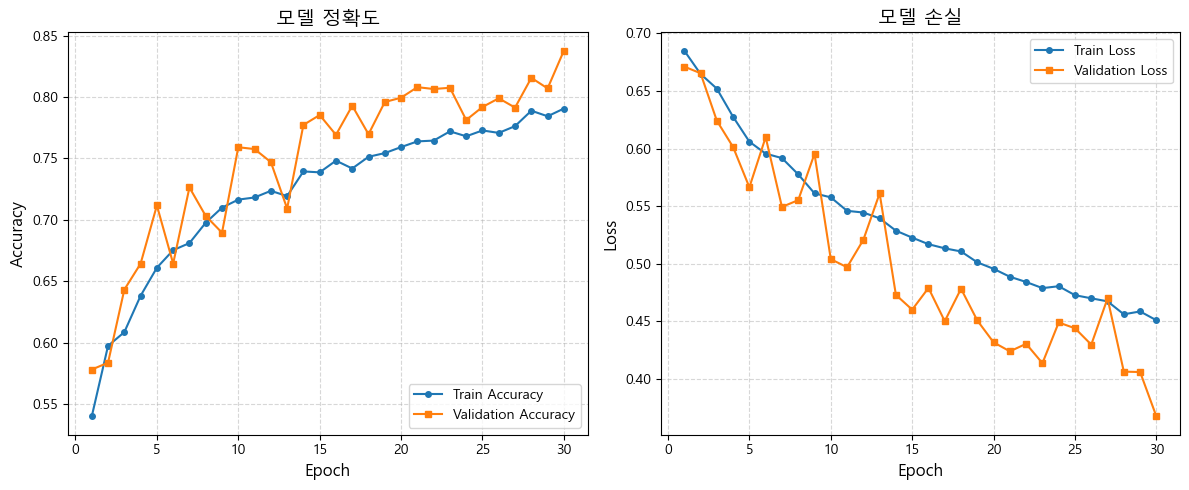

최종 검증 정확도: 0.8377, 최종 검증 손실: 0.3673


In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# (예시) history.history에 저장된 값들
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 5), dpi=100)

plt.subplot(1, 2, 1)  
plt.plot(epochs_range, acc, label='Train Accuracy', marker='o', markersize=4)
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='s', markersize=4)
plt.title('모델 정확도', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right', fontsize=10)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o', markersize=4)
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='s', markersize=4)
plt.title('모델 손실', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()

plt.show()

final_val_acc = val_acc[-1]
final_val_loss = val_loss[-1]
print(f"최종 검증 정확도: {final_val_acc:.4f}, 최종 검증 손실: {final_val_loss:.4f}")


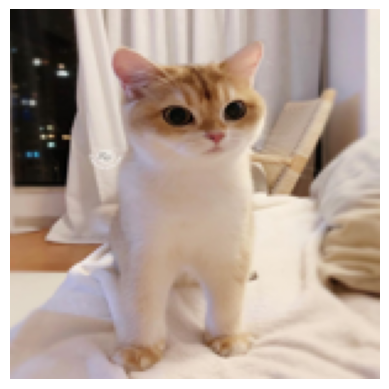

1/1 [==============================] - 0s 120ms/step
모델 예측: 고양이 (확률: 0.5782)


In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

test_image_path = r'C:/Users/PC/Desktop/CNN_Model/example/cat.jpg'

# 2) 이미지 로드 및 전처리 (PIL 사용)
img = Image.open(test_image_path).convert('RGB')
img = img.resize((150, 150))
img_array = np.array(img) / 255.0               # (150, 150, 3)
img_input = np.expand_dims(img_array, axis=0)  # (1, 150, 150, 3)

# 3) 이미지 화면에 표시
plt.imshow(img_array)
plt.axis('off')
plt.show()

# 4) 모델 예측 수행
prediction = model.predict(img_input)

# 5) 결과 출력
if prediction < 0.5:
    print(f"모델 예측: 고양이 (확률: {1 - prediction[0][0]:.4f})")
else:
    print(f"모델 예측: 강아지 (확률: {prediction[0][0]:.4f})")